# Quicksort
## CSC 110 Spring 2020
## Joe McEwen, (c) 2020

[Quicksort](https://en.wikipedia.org/wiki/Quicksort) is a sorting algorithm. For example, suppose we had the list [12, -20, 14, 80, 1], when the quicksort algorithm is applied to this list the return would be the list [-20, 1, 12, 14, 80]. The quicksort algorithm is also a good example of using recursion in python (i.e. the ability of a function call itself.)

There are two parts to the quick sort algorithm, the partition function, and a recursive fuction that utilizes the partition function. 

In this notebook we will utilize the Lomuto partition scheme (see the wikipedia page for more information). The psuedo code for this method is below. 

**algorithm quicksort**(A, lo, hi) is  
$\quad$ **if** lo < hi **then**  
$\quad$ $\quad$ p := partition(A, lo, hi)  
$\quad$ $\quad$ quicksort(A, lo, p - 1)  
$\quad$ $\quad$ quicksort(A, p + 1, hi)

**algorithm partition**(A, lo, hi) is  
$\quad$ pivot := A[hi]  
$\quad$ $\quad$ i := lo  
$\quad$ $\quad$ $\quad$ **for** j := lo **to** hi **do**  
$\quad$ $\quad$ $\quad$ $\quad$**if** A[j] < pivot **then**  
$\quad$ $\quad$ $\quad$ $\quad$ $\quad$ swap A[i] with A[j]  
$\quad$ $\quad$ $\quad$ $\quad$ $\quad$ i := i + 1  
$\quad$ $\quad$ $\quad$ $\quad$ $\quad$ swap A[i] with A[hi]  
$\quad$**return** i

Note: the algorithm is written in psuedo code and we should be careful that when we write our code in python we get our location indexing correct. 


## understanding the algorithm
To understand the algorithm lets explicitly walk through an example using words (instead of code) as move along. 

The example list will be [20, 0, -10, 15, 5]. We will start with the following values for low, high, and the pivot. Remember that the pivot in our algorithm is the "right" most element in the list. 

low=0 

high=4 

pivot = 5

list=[20, 0, -10, 15, 5]

**start loop**  
* i =-1, j=0 (Note values of i and j are reflective of the fact that python location indexing starts at zero.)
* ask 20 <= 5 (False), move on 

**second iteration**
* i=-1, j=1
* ask 0 <=5 (True) 
* then i=i+1 (i =0) 
* swap i and j elements
* new list is [0, 20, -10, 15, 5]  ( note things less than the pivot are moving to the left of i+1) 

**third iteration**
* i=0, j=2
* ask -10 <= 5 (true)
* then i=i+1 (i =1) 
* swap i and j elements
* new list is [0, -10, 20, 15, 5] ( note things less than the pivot are moving to the left of i+1) 

**fourth iteration** 
* i=1, j=3
* ask 15 <= 5 (False), move on

**end of loop**

Now, i is at 1. Everything to the left of i+1 (=2) is less than the pivot. Everything to the right of (including) i+1 is greater than the pivot (up to the element[high]. The last step is to swap the element at i+1 and high, so that the 
list is now:
[0, -10, 5, 15, 20]

The final step places the pivot value at is "correct" location. 

The partition function would then return the pivot location i+1 (=2). 

The list can then be split between into sections
\begin{align} 
[ \underbrace{ 0, -10 }_{left},5, \underbrace{ 15, 20 }_{right} ]~. 
\end{align} 
We then would perform quicksork on the left and right sections. 

The recursive aspect of the quicksort algorithm is diplayed in the image below (take from here: https://www.techiedelight.com/quicksort/). 

![](Quicksort.png)

## Python verions of quicksort
A python version of quick sort is coded below.

In [1]:
def partition(array,low,high):
    
    pivot=array[high]
    
    i=(low-1) 
    
    for j in range(low,high):
        
        if array[j] <= pivot:
            # if element is less than or equal to pivot swap 
            i+=1
           
            array[j], array[i] = array[i] , array[j]
            
   
    array[i+1], array[high]=array[high], array[i+1]
    
    return i + 1

def quicksort(array,low,high): 
    if low < high: 
  
        i_pivot= partition(array,low,high) 
  
        quicksort(array,low, i_pivot-1) 
        quicksort(array,i_pivot+1, high) 
        

In [2]:
# generate a list of integers using randint
# from the random library 

from random import randint

array=[]
n=15
max_val=20
min_val=-20

for i in range(n):
    array.append(randint(min_val,max_val))
    
print(array)

[1, -6, -13, -12, -16, -13, 20, -2, 4, -1, 1, -1, 11, 17, -3]


In [3]:
quicksort(array,0,len(array)-1)
print(array)

[-16, -13, -13, -12, -6, -3, -2, -1, -1, 1, 1, 4, 11, 17, 20]


## Big-O 
How many comparisons does quicksort need to make to sort a list of numbers? The answer, of course, depends on the number of elements in the array. We often talk about the performance of an algorithm in terms of what is called big-O notation. In the best case scenario, quick sort takes order $n \log(n)$ opertations, where n is the number of elements in the array. In big-O notation this is $O(n\log(n))$. In the worst case scenario quicksort takes $n^2$ operations. 
Below is a plot of several big-O operations. 

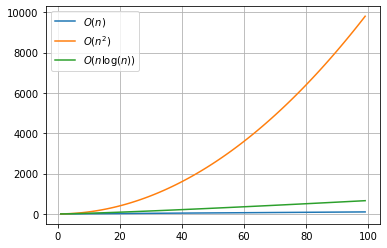

In [19]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
n=np.arange(1,100)


nlogn=n*np.log2(n)

fig=plt.figure()
ax=fig.add_subplot()
ax.plot(n,n,label=r"$O(n)$")
ax.plot(n,n**2,label=r"$O(n^2)$")
ax.plot(n,nlogn,label=r"$O(n\log(n))$")
ax.grid()
ax.legend()